# Assignment 3
## Group 1

## 3) Use a transformation to convert the taken images into a square-shaped top-down view (bird-eye view) image with a resolution of 250x250. For instance, similar to the example below

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### 1st image: A banknote

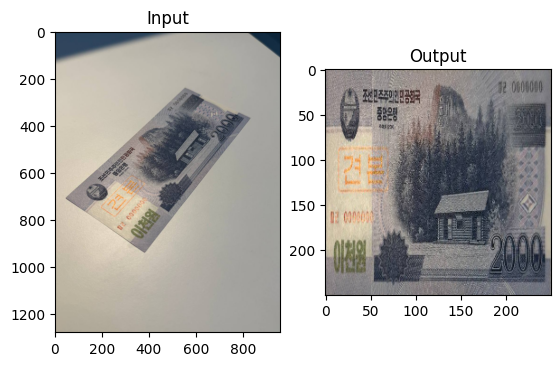

In [2]:

img = cv.imread('img1.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert to RGB

rows,cols,ch = img.shape
'''
image edges: from click_event() function below
[46, 713],
[554, 241],
[379, 943],
[829, 367]
'''
pts1 = np.float32([[46, 713],[554, 241],[379, 943],[829, 367]])
pts2 = np.float32([[0,0],[250,0],[0,250],[250,250]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(250,250))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### 2nd image: A card

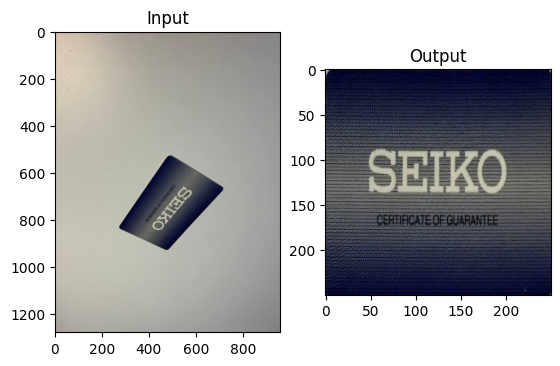

In [3]:
img = cv.imread('img2.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert to RGB

rows,cols,ch = img.shape
'''
image edges: from click_event() function below
[720, 668],
[475, 932],
[485, 529],
[271, 836]
'''
pts1 = np.float32([[720, 668],[475, 932],[485, 529],[271, 836]])
pts2 = np.float32([[0,0],[250,0],[0,250],[250,250]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(250,250))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### 3rd image: A book

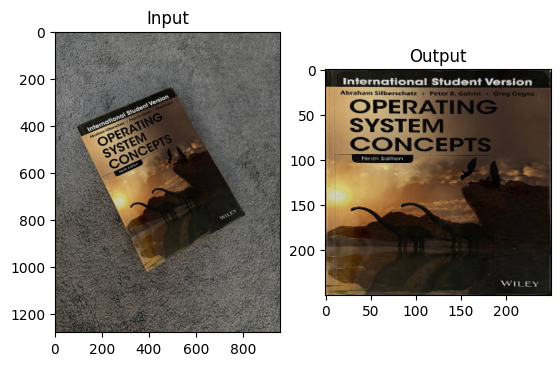

In [4]:
img = cv.imread('img3.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # Convert to RGB

rows,cols,ch = img.shape
'''
image edges: from click_event() function below
[90, 405],
[496, 235],
[391, 1024],
[806, 779]
'''
pts1 = np.float32([[90, 405],[496, 235],[391, 1024],[806, 779]])
pts2 = np.float32([[0,0],[250,0],[0,250],[250,250]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(250,250))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### Additional: *A helper function that capture the pixels that were clicked on by the cursor*

In [5]:
# Code to get coordinates from an image, 
# modified from: https://www.geeksforgeeks.org/python/displaying-the-coordinates-of-the-points-clicked-on-the-image-using-python-opencv/
def click_event(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(f'[{x}, {y}],')
        font = cv.FONT_HERSHEY_SIMPLEX
        cv.putText(img, f"{x},{y}", (x, y), font, 1, (255, 0, 0), 1)
        cv.imshow('image', img)

if __name__=="__main__":
    img = cv.imread('gallery.jpg', 1)
    cv.namedWindow('image', cv.WINDOW_NORMAL)
    cv.resizeWindow('image', 800, 600)
    cv.imshow('image', img)
    cv.setMouseCallback('image', click_event)
    cv.waitKey(0)
    cv.destroyAllWindows()

# click top left, top right, bottom left, bottom right

## 4) Using OpenCV libraries to download a random image from the internet using its URL (must have a Creative Commons license), and save it to your working directory with a name ASG3.JPG. Do the following pixel operations on the image

### Reading the image using its URL:

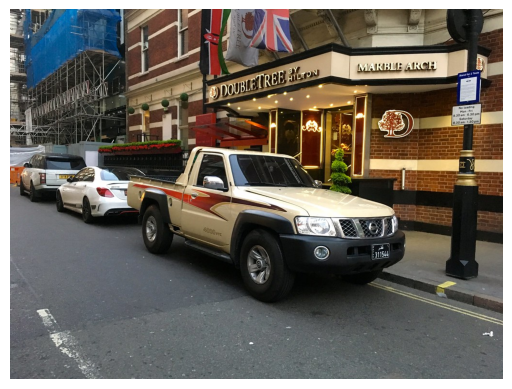

True

In [6]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

# Download image
url = "https://live.staticflickr.com/973/41145083295_852c158f85_b.jpg"
resp = requests.get(url)
img_bytes = np.asarray(bytearray(resp.content), dtype=np.uint8)
img = cv2.imdecode(img_bytes, cv2.IMREAD_COLOR)

# Convert BGR → RGB for correct colors in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# Save
cv2.imwrite("ASG3.JPG", img)

### A. Resize it to 400x400

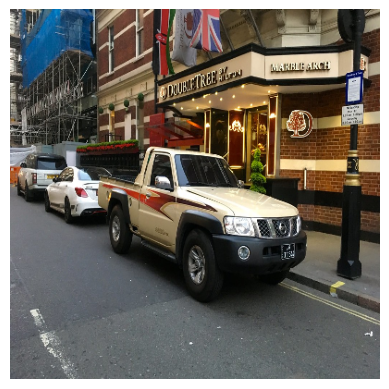

(400, 400, 3)


In [7]:
#Showing after resizing the image
img_resized = cv2.resize(img_rgb, (400,400)) 
plt.imshow(img_resized)
plt.axis('off')
plt.show()
img_resized = cv2.cvtColor(img_resized, cv2.COLOR_RGB2BGR) #converting back to BGR, because when the image is RGB it saves it as BGR
cv2.imwrite('ASG3_resized.jpg', img_resized)
print(img_resized.shape)

### B. Separate the channels R, G, and B.

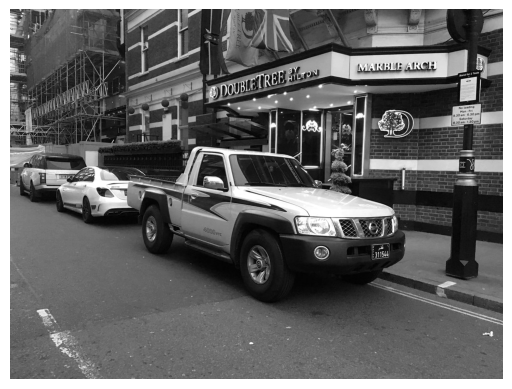

In [8]:
#Seperating each channel (RGB) and merging them back
b, g, r = cv2.split(img_rgb)


cv2.imwrite("ASG3_R.jpg", r)
cv2.imwrite("ASG3_G.jpg", g)
cv2.imwrite("ASG3_B.jpg", b)

#Can change the b to r and g to show the image
plt.imshow(g, cmap="gray") #cmap is used to show the intensity, if removed it will show very similiar
plt.axis('off')
plt.show()

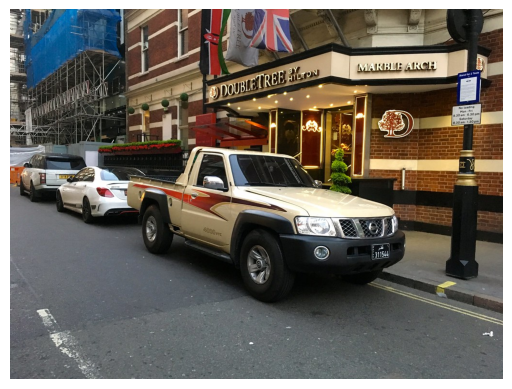

In [9]:
img_merged = cv2.merge((r, g, b))
plt.imshow(cv2.cvtColor(img_merged, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### C. Convert it to grayscale and mirror horizontally, and increase contrast by adding 50 to each pixel.

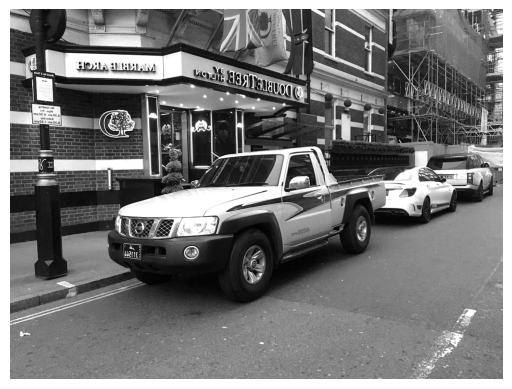

In [10]:
gray_scale = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) #Converting to gray scale
mirrored = cv2.flip(gray_scale, 1) #Flipping th image horizentally
contrast_img = cv2.add(mirrored, 50) #Adding 50 to perform constracting
cv2.imwrite("ASG3_processed.JPG", contrast_img)

plt.imshow(contrast_img, cmap="gray")
plt.axis('off')
plt.show()

### D. Upscale the grayscale image to 800x800

(800, 800)


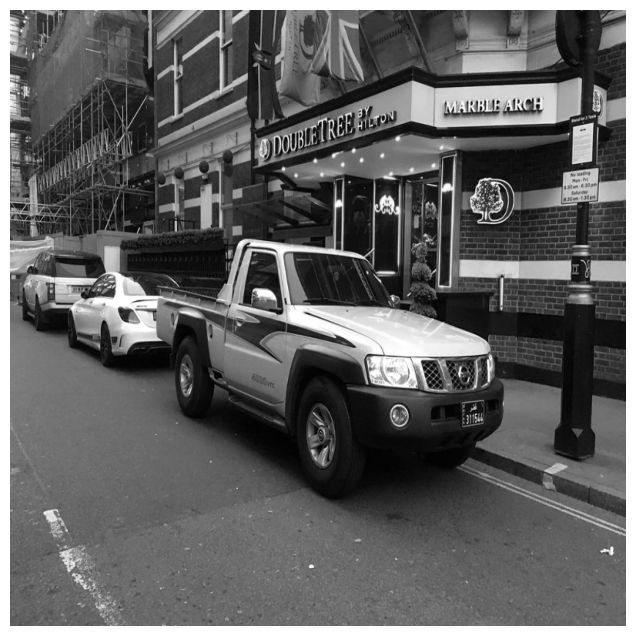

True

In [11]:
image_upscaled = cv2.resize(gray_scale, (800,800))
print(image_upscaled.shape) #Just to show that the image has been upscaled successfully
plt.figure(figsize=(8,8))
plt.imshow(image_upscaled, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite("ASG3_upscaled.JPG", image_upscaled)

## 5) Generate an image with additive Gaussian Noise.

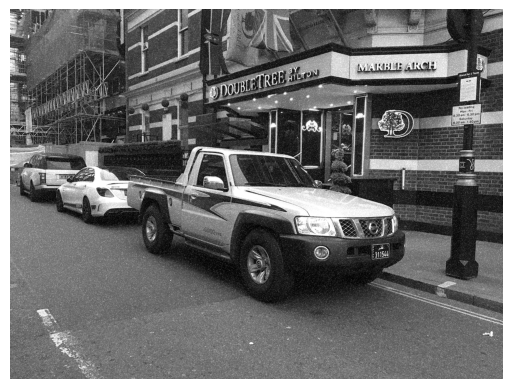

True

In [12]:
#Generating the image with additive Gaussian Noise
mean = 0
std = 25  # Standard deviation for noise intensity
noise = np.zeros(gray_scale.shape, np.uint8)
cv2.randn(noise, mean, std)
noisy_img = cv2.add(gray_scale, noise)

noisy_img = np.clip(noisy_img, 0, 255)

plt.imshow(noisy_img, cmap='gray')
plt.axis('off')
plt.show()

cv2.imwrite('ASG3_gNois.jpg', noisy_img)

### A. Apply Smoothening filter with 3x3 kernel, 5x5 kernel and 7x7 kernel

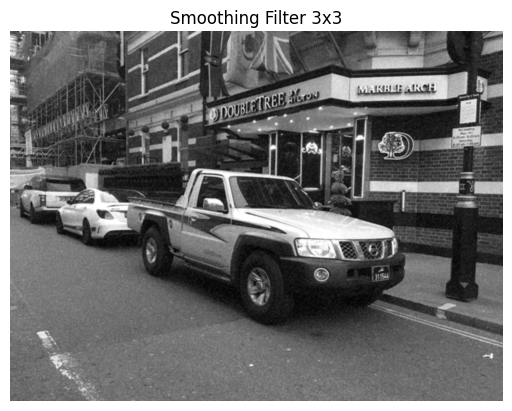

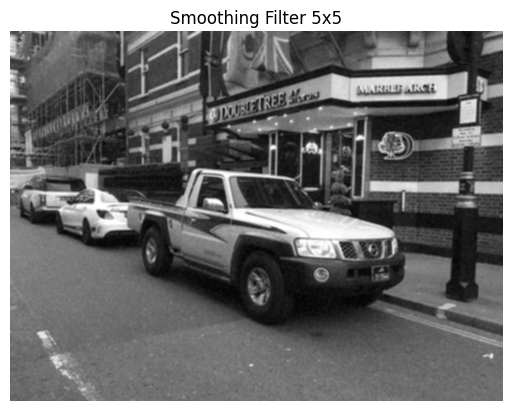

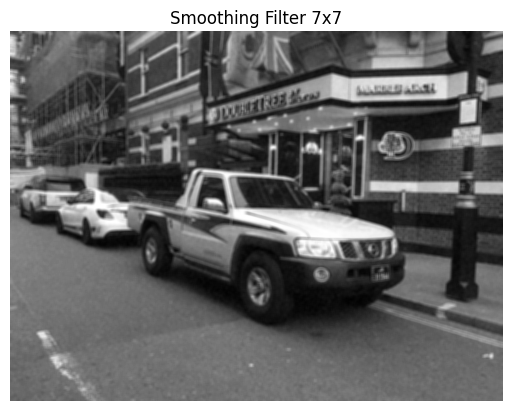

In [13]:
#Applying filters with 3x3 kernel, 5x5 kernel and 7x7 kernel
kernel_sizes = [3, 5, 7]

#Smoothing (Averging)
for k in kernel_sizes:
    smooth = cv2.blur(noisy_img, (k, k))
    plt.figure()
    plt.imshow(smooth, cmap='gray')
    plt.title(f"Smoothing Filter {k}x{k}")
    plt.axis('off')
    plt.show()

### B. Apply Median filter with 3x3 kernel, 5x5 kernel and 7x7 kernel

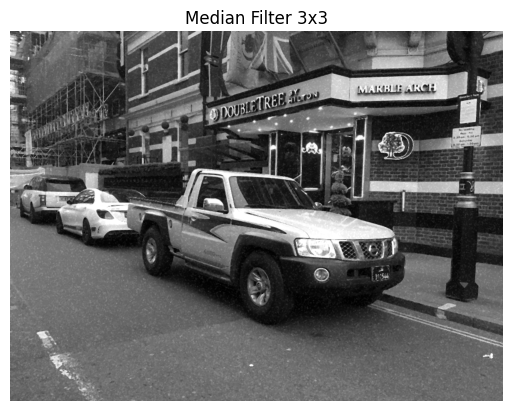

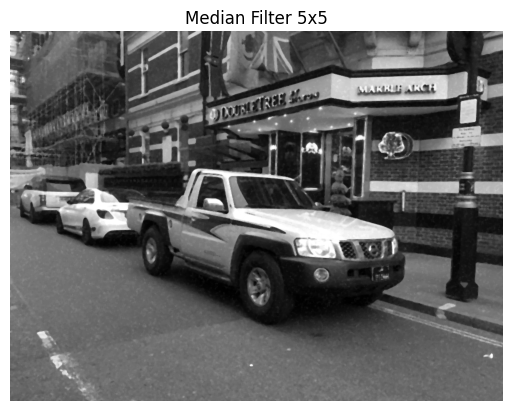

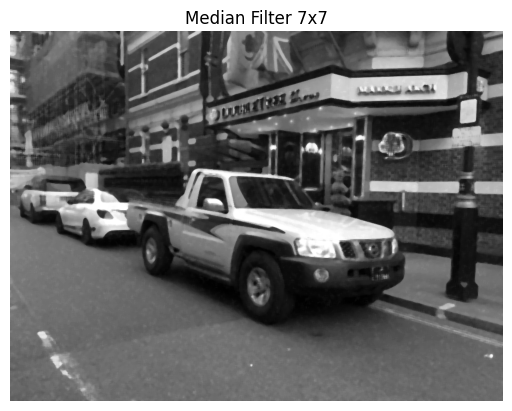

In [14]:
#Median
for k in kernel_sizes:
    median = cv2.medianBlur(noisy_img, k)
    plt.figure()
    plt.imshow(median, cmap='gray')
    plt.title(f"Median Filter {k}x{k}")
    plt.axis('off')
    plt.show()

### C. Apply Gaussian filter with 3x3 kernel, 5x5 kernel and 7x7 kernel

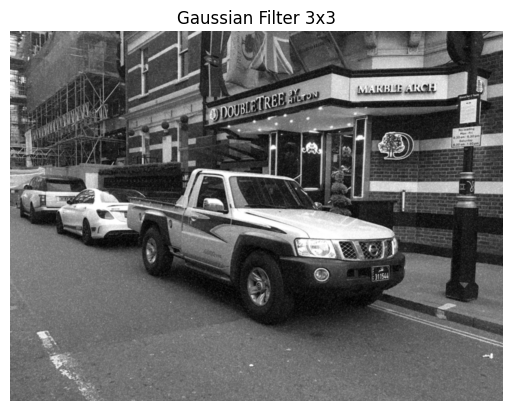

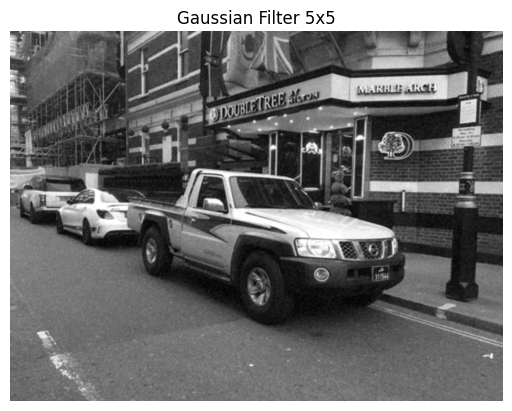

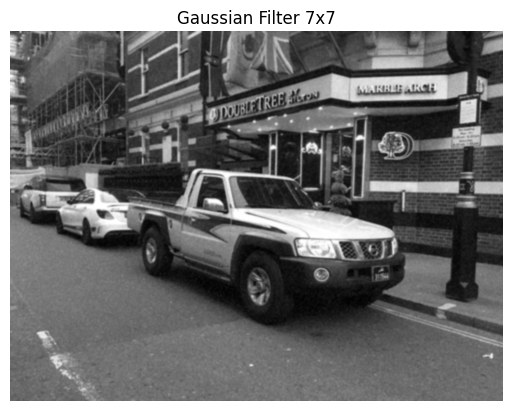

In [15]:
#Gaussian
for k in kernel_sizes:
    gaussian = cv2.GaussianBlur(noisy_img, (k, k), 0)
    plt.figure()
    plt.imshow(gaussian, cmap='gray')
    plt.title(f"Gaussian Filter {k}x{k}")
    plt.axis('off')
    plt.show()

## 6) Generate an image with Salt & Pepper noise. Apply Median filter with 5x5 kernel and 

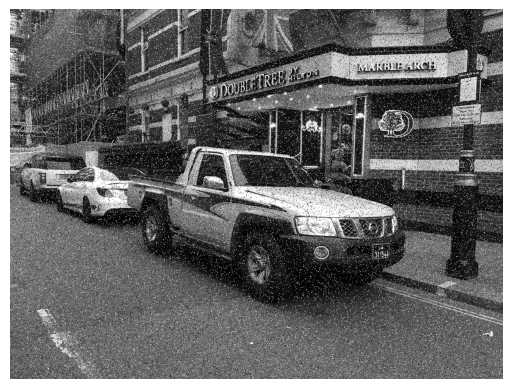

In [16]:
#Generate an image with Salt & Pepper noise. 
noisy = gray_scale.copy()
num = int(0.05 * gray_scale.size)
coords = [np.random.randint(0, i, num) for i in gray_scale.shape]
noisy[coords[0], coords[1]] = 255  # salt
coords = [np.random.randint(0, i, num) for i in gray_scale.shape]
noisy[coords[0], coords[1]] = 0    # pepper

cv2.imwrite('ASG3_salt&pepper.jpg', noisy)
plt.figure()
plt.imshow(noisy, cmap='gray')
plt.axis('off')
plt.show()

### A. Zero padding, B. Circular padding, C. Symmetrical padding

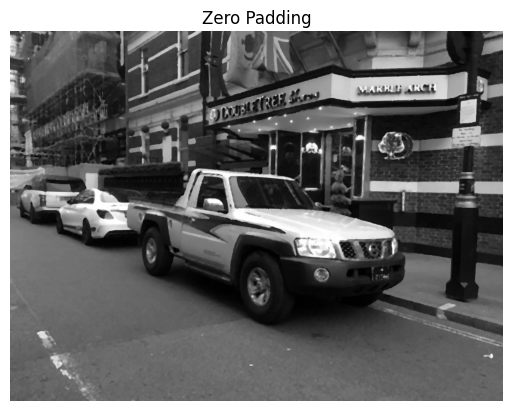

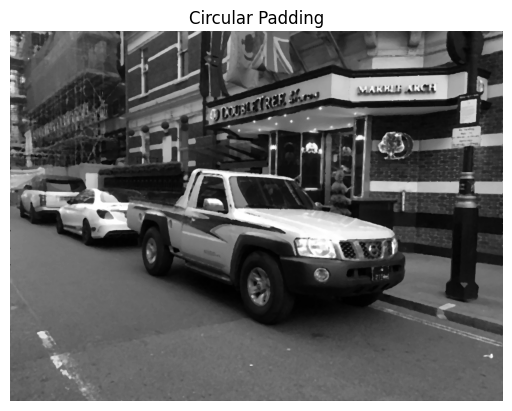

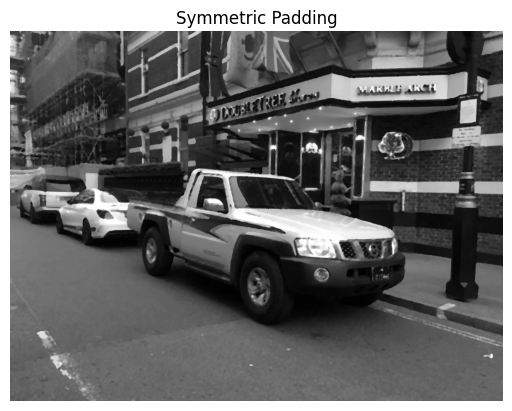

In [17]:
# Salt & Pepper noise
noisy = gray_scale.copy()
num = int(0.05*gray_scale.size)
coords = [np.random.randint(0, i, num) for i in gray_scale.shape]; noisy[coords[0], coords[1]] = 255
coords = [np.random.randint(0, i, num) for i in gray_scale.shape]; noisy[coords[0], coords[1]] = 0

k = 5; pad = k//2
# Median filters with different paddings
median_zero = cv2.medianBlur(noisy, k)
median_circular = cv2.medianBlur(cv2.copyMakeBorder(noisy, pad,pad,pad,pad, cv2.BORDER_WRAP), k)[pad:-pad,pad:-pad]
median_symmetric = cv2.medianBlur(cv2.copyMakeBorder(noisy, pad,pad,pad,pad, cv2.BORDER_REFLECT), k)[pad:-pad,pad:-pad]


# Display
plt.figure(); plt.imshow(median_zero, cmap='gray'); plt.title("Zero Padding"); plt.axis('off'); plt.show()
plt.figure(); plt.imshow(median_circular, cmap='gray'); plt.title("Circular Padding"); plt.axis('off'); plt.show()
plt.figure(); plt.imshow(median_symmetric, cmap='gray'); plt.title("Symmetric Padding"); plt.axis('off'); plt.show()

## 7) Apply the Sharpening filter on the 400x400 resized image

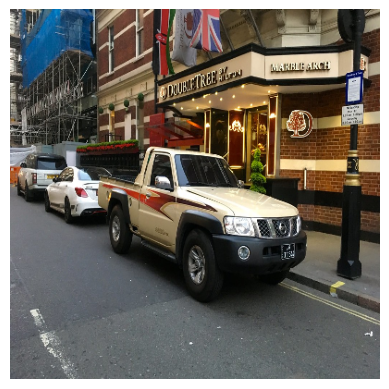

True

In [18]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])
img_sharpened = cv2.filter2D(img_resized, -1, sharpen_kernel)
img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img_resized, cmap='gray')
plt.axis('off')
plt.show()
img_resized = cv2.cvtColor(img_resized, cv2.COLOR_RGB2BGR)
cv2.imwrite("ASG3_sharpenned.jpg", img_sharpened)

## 8) Apply the Thresholding filter on the 400x400 resized image

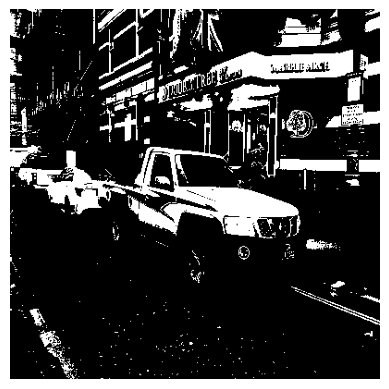

True

In [19]:
img_resized = cv2.cvtColor(img_resized,cv2.COLOR_BGR2GRAY)
_, thresholded = cv2.threshold(img_resized, 128, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(thresholded, cmap='gray')
plt.axis('off')
plt.show()
cv2.imwrite("ASG3_threshold.jpg", thresholded)

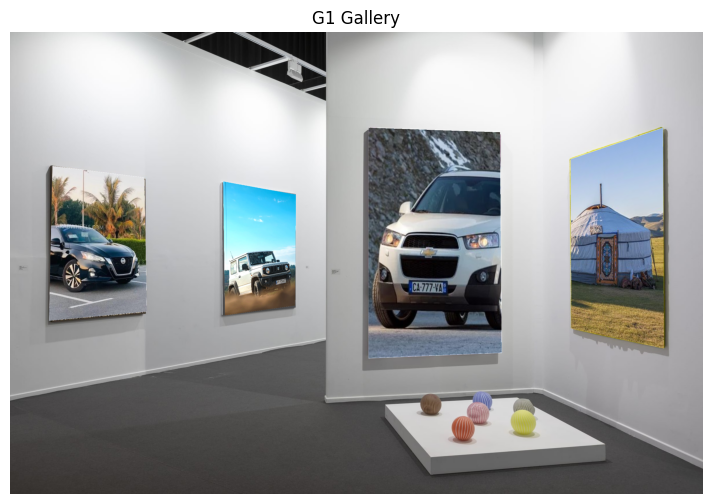

[+] Saved: gallery_replaced.png


In [20]:
import cv2 as cv

# --- paths ---
GALLERY_PATH = "gallery.jpg"
REPLACEMENTS = [
    "altima.jpg",   # goes into frame1
    "jimny.jpg",   # goes into frame2
    "captiva.jpg",    # goes into frame3
    "yurt.jpg",    # goes into frame4
]

# --- frame coordinates (x,y) order: TL, TR, BR, BL ---
'''
    [147, 464],
    [465, 504],
    [135, 1000],
    [474, 968]
    
    [738, 517],
    [990, 563],
    [744, 981],
    [987, 947]
    
    [1242, 331],
    [1698, 347],
    [1242, 1131],
    [1704, 1112]
    
    [1941, 440],
    [2262, 331],
    [1944, 1027],
    [2265, 1096],
'''
frame1 = np.float32([
    [147, 464],
    [465, 504],
    [135, 1000],
    [474, 968]

])

frame2 = np.float32([
    [738, 517],
    [990, 563],
    [744, 981],
    [987, 947]
])

frame3 = np.float32([
    [1242, 331],
    [1698, 347],
    [1242, 1131],
    [1704, 1112]
])

frame4 = np.float32([
    [1941, 440],
    [2262, 331],
    [1944, 1027],
    [2265, 1096],
])

frames = [frame1, frame2, frame3, frame4]

# --- helpers ---
def bgr2rgb(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

def warp_into_quad(base_rgb, insert_bgr, quad_pts):
    base = base_rgb.copy()
    hB, wB = base.shape[:2]
    hS, wS = insert_bgr.shape[:2]

    src = np.float32([[0,0], [wS,0], [0,hS], [wS,hS]])
    dst = np.float32(quad_pts)

    H = cv.getPerspectiveTransform(src, dst)
    warped_bgr = cv.warpPerspective(insert_bgr, H, (wB, hB))
    mask_src = np.full((hS, wS), 255, np.uint8)
    mask = cv.warpPerspective(mask_src, H, (wB, hB))

    inv = cv.bitwise_not(mask)
    base_bgr = cv.cvtColor(base, cv.COLOR_RGB2BGR)

    bg = cv.bitwise_and(base_bgr, base_bgr, mask=inv)
    fg = cv.bitwise_and(warped_bgr, warped_bgr, mask=mask)
    out_bgr = cv.add(bg, fg)
    return bgr2rgb(out_bgr)

# --- load gallery ---
gallery_bgr = cv.imread(GALLERY_PATH)
assert gallery_bgr is not None, f"Couldn't read {GALLERY_PATH}"
canvas = bgr2rgb(gallery_bgr)

# --- apply replacements ---
for art_path, quad in zip(REPLACEMENTS, frames):
    art_bgr = cv.imread(art_path)
    if art_bgr is None:
        print(f"[skip] {art_path} not found.")
        continue
    canvas = warp_into_quad(canvas, art_bgr, quad)

# --- final display ---
plt.figure(figsize=(10,6))
plt.imshow(canvas)
plt.axis('off')
plt.title("G1 Gallery")
plt.show()

out_path = "gallery_replaced.png"
cv.imwrite(out_path, cv.cvtColor(canvas, cv.COLOR_RGB2BGR))
print(f"[+] Saved: {out_path}")